In [1]:
!pip install yfinance pandas numpy matplotlib 

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.0 MB/s eta 0:00:00eta 0:00:01
  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15548 sha256=64a3e1603732209e28faab7aa7e14443b6a5b37c853754e57f8ac0ad9bd91256
  Stored in directory: 

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Matplotlib is building the font cache; this may take a moment.


In [3]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
start_date = '2022-01-01'
end_date = '2023-12-31'

data = yf.download (tickers, start=start_date, end=end_date) ['Adj Close'] 
data.head()

/var/folders/s8/9q3v8mfj1v3gvlqg50srfys40000gn/T/ipykernel_77656/3263305412.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download (tickers, start=start_date, end=end_date) ['Adj Close']
[*********************100%***********************]  4 of 4 completed


KeyError: 'Adj Close'

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
data = yf.download (tickers, start='2022-01-01', end='2023-01-01')['Close'] 
data.head()

/var/folders/s8/9q3v8mfj1v3gvlqg50srfys40000gn/T/ipykernel_77656/1458681162.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download (tickers, start='2022-01-01', end='2023-01-01')['Close']
[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2022-01-03,178.270325,170.404495,143.904205,323.898438
2022-01-04,176.007751,167.522003,143.316650,318.344482
2022-01-05,171.326019,164.356995,136.741837,306.123871
2022-01-06,168.465988,163.253998,136.714523,303.704926
2022-01-07,168.632492,162.554001,135.989517,303.859772


In [6]:
print (data.columns)

Index(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype='object', name='Ticker')


In [7]:
daily_returns = data.pct_change().dropna()
daily_returns.head()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2022-01-04,-0.012692,-0.016916,-0.004083,-0.017147
2022-01-05,-0.026600,-0.018893,-0.045876,-0.038388
2022-01-06,-0.016694,-0.006711,-0.000200,-0.007902
2022-01-07,0.000988,-0.004288,-0.005303,0.000510
2022-01-10,0.000116,-0.006570,0.012060,0.000732


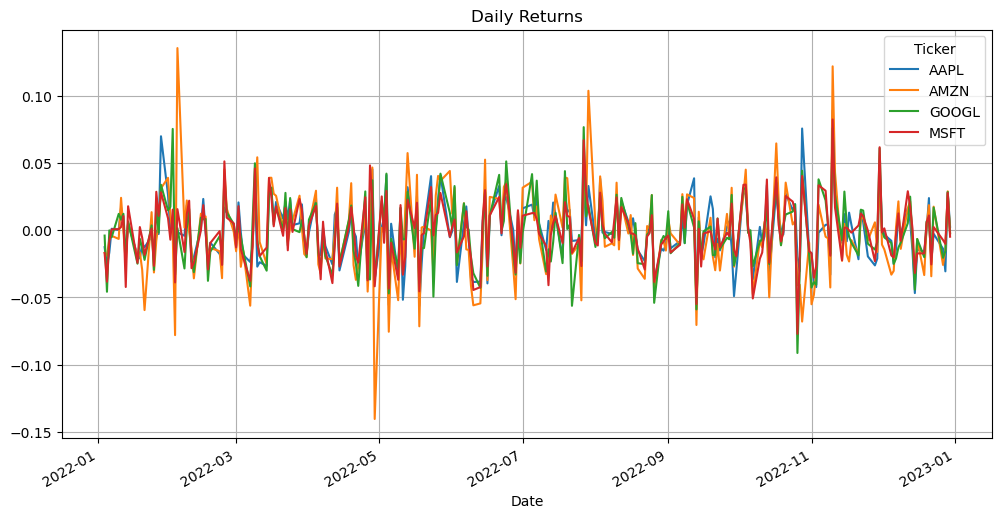

In [8]:
daily_returns.plot(figsize=(12,6), title="Daily Returns")
plt.grid(True)
plt.show()

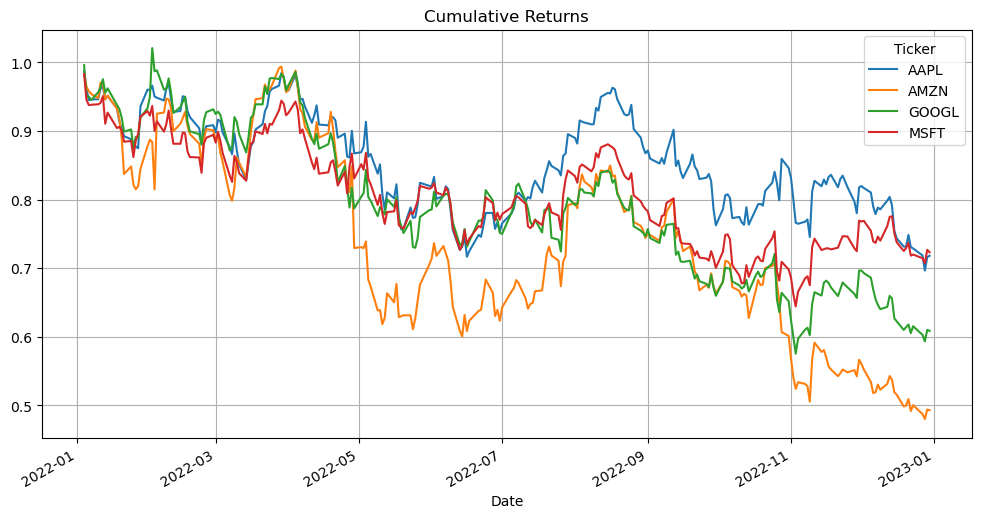

In [10]:
cumulative_returns=(1+daily_returns).cumprod()
cumulative_returns.plot(figsize=(12,6), title="Cumulative Returns")
plt.grid(True)
plt.show()

In [11]:
volatility=daily_returns.std()
print("Volatility (Standart Deviation):")
print(volatility.sort_values(ascending=False))

Volatility (Standart Deviation):
Ticker
AMZN     0.031571
GOOGL    0.024396
AAPL     0.022471
MSFT     0.022289
dtype: float64


In [12]:
correlation=daily_returns.corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
Ticker      AAPL      AMZN     GOOGL      MSFT
Ticker                                        
AAPL    1.000000  0.695904  0.798268  0.824901
AMZN    0.695904  1.000000  0.722229  0.741196
GOOGL   0.798268  0.722229  1.000000  0.850336
MSFT    0.824901  0.741196  0.850336  1.000000


In [15]:
correlation

Ticker,AAPL,AMZN,GOOGL,MSFT
Ticker,,,,
AAPL,1.000000,0.695904,0.798268,0.824901
AMZN,0.695904,1.000000,0.722229,0.741196
GOOGL,0.798268,0.722229,1.000000,0.850336
MSFT,0.824901,0.741196,0.850336,1.000000
